In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("loan_approval_dataset.csv")

In [4]:
data.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [7]:
data.shape

(4269, 13)

In [8]:
data = data.drop(["loan_id"], axis=1)

In [10]:
le = LabelEncoder()

data[" education"] = le.fit_transform(data[" education"])
data[" self_employed"] = le.fit_transform(data[" self_employed"])
data[" loan_status"] = le.fit_transform(data[" loan_status"])

In [11]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [14]:
data.describe().style.background_gradient(cmap="Blues")


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2.498712,0.497775,0.503631,5059123.916608,15133450.456781,10.900445,599.936051,7472616.537831,4973155.305692,15126305.926446,4976692.433825,0.377840
std,1.695910,0.500054,0.500045,2806839.831818,9043362.984843,5.709187,172.430401,6503636.587664,4388966.089638,9103753.665256,3250185.305696,0.484904
min,0.000000,0.000000,0.000000,200000.000000,300000.000000,2.000000,300.000000,-100000.000000,0.000000,300000.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2700000.000000,7700000.000000,6.000000,453.000000,2200000.000000,1300000.000000,7500000.000000,2300000.000000,0.000000
50%,3.000000,0.000000,1.000000,5100000.000000,14500000.000000,10.000000,600.000000,5600000.000000,3700000.000000,14600000.000000,4600000.000000,0.000000
75%,4.000000,1.000000,1.000000,7500000.000000,21500000.000000,16.000000,748.000000,11300000.000000,7600000.000000,21700000.000000,7100000.000000,1.000000
max,5.000000,1.000000,1.000000,9900000.000000,39500000.000000,20.000000,900.000000,29100000.000000,19400000.000000,39200000.000000,14700000.000000,1.000000


In [15]:
data.isnull().sum()


no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

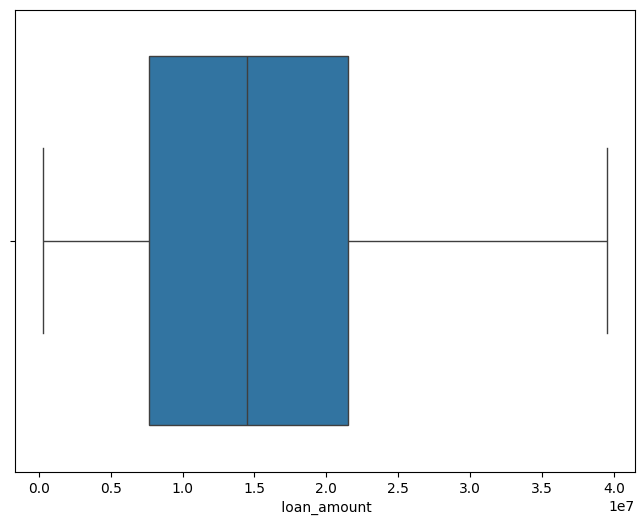

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data,x=" loan_amount")
plt.show()

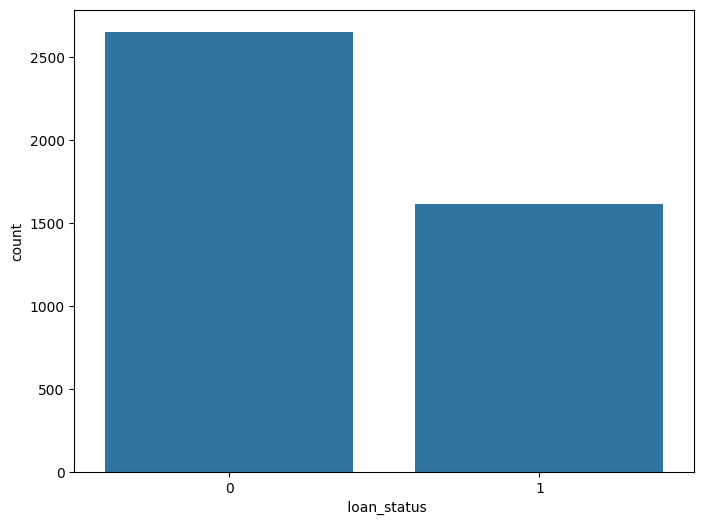

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data,x=" loan_status")
plt.show()

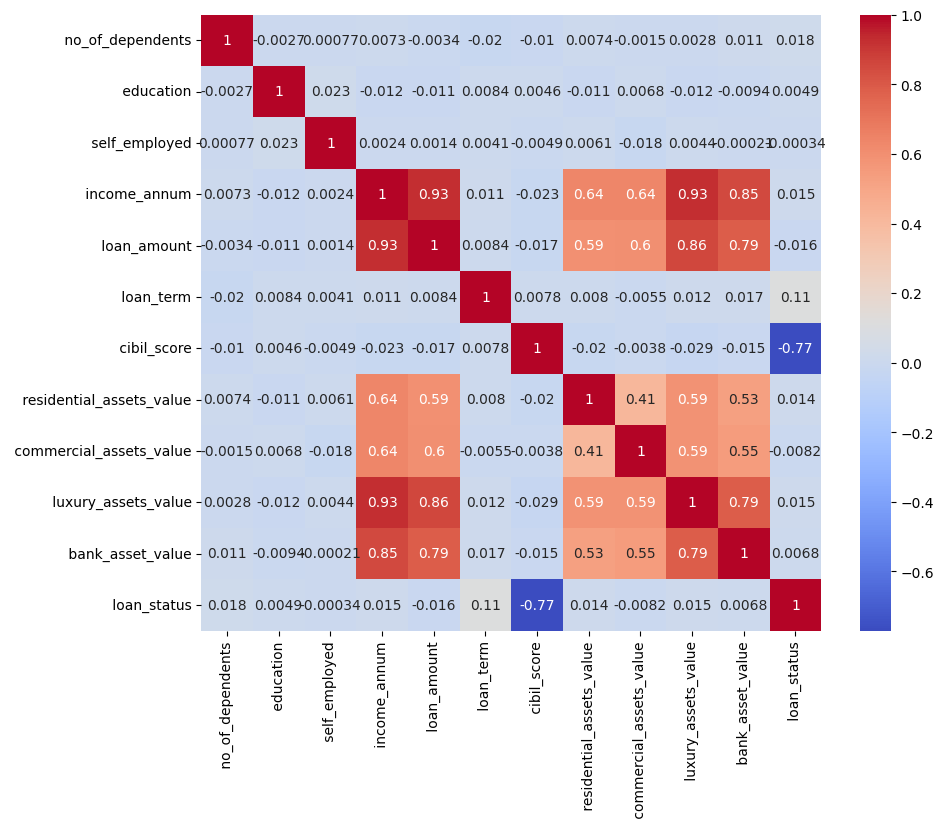

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.show()

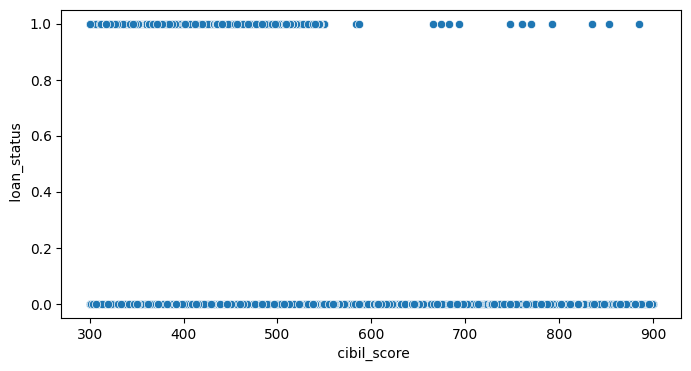

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=' cibil_score',y=' loan_status',data=data)
plt.show()

In [21]:
x = data.drop([" loan_status"],axis=1)
y = data[" loan_status"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [23]:
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

In [24]:
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       263
           1       0.77      0.40      0.52       164

    accuracy                           0.72       427
   macro avg       0.74      0.66      0.66       427
weighted avg       0.74      0.72      0.70       427

Accuracy of Logistic Regression is :  72.36533957845434


In [26]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.27634660421545665
Mean Squared Error :  0.27634660421545665
Root Mean Squared Error :  0.5256867928866548
R2 Score :  -0.16818139664286336


In [28]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       263
           1       0.96      0.96      0.96       164

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427

Accuracy of Decision Tree is :  97.18969555035129


In [29]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.02810304449648712
Mean Squared Error :  0.02810304449648712
Root Mean Squared Error :  0.16763962686813377
R2 Score :  0.8812018918668274


In [31]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       263
           1       0.97      0.96      0.97       164

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427

Accuracy of Random Forest is is :  97.42388758782201


In [32]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.02576112412177986
Mean Squared Error :  0.02576112412177986
Root Mean Squared Error :  0.16050272309770902
R2 Score :  0.8911017342112585


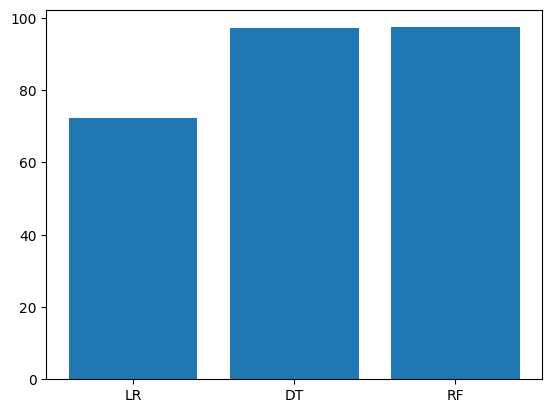

In [33]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

In [34]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                      feature  importance
6                 cibil_score    0.823083
5                   loan_term    0.060749
4                 loan_amount    0.027376
9         luxury_assets_value    0.016638
7    residential_assets_value    0.016200
3                income_annum    0.016056
8     commercial_assets_value    0.014710
10           bank_asset_value    0.013852
0            no_of_dependents    0.007043
2               self_employed    0.002488
1                   education    0.001805
